In [13]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from scipy.stats import ttest_ind

In [14]:
data = xr.open_dataset('sst.nc')
sst_nino34 = data.sel(lat=slice(-5,5), lon=slice(190,240))
tmp = sst_nino34.sst.groupby('time.month')
tmp1 = tmp - tmp.mean(dim='time')
nino34_index = tmp1.mean(dim=['lat', 'lon'])

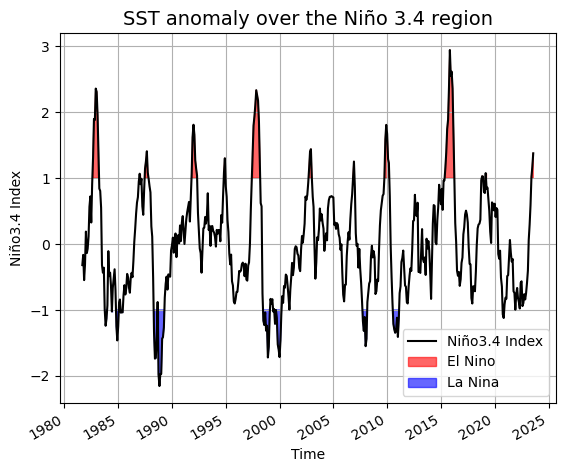

In [15]:
nino34_index.plot(color='black', label='Niño3.4 Index')
plt.fill_between(nino34_index.time, nino34_index, 1, where=nino34_index >= 1, color='red', alpha=0.6, label='El Nino')
plt.fill_between(nino34_index.time, nino34_index, -1, where=nino34_index <= -1, color='blue', alpha=0.6, label='La Nina')
plt.title('SST anomaly over the Niño 3.4 region', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Niño3.4 Index')
plt.grid(True)
plt.legend()
plt.show()

nghich 1 ti klq den bai (hoac co)

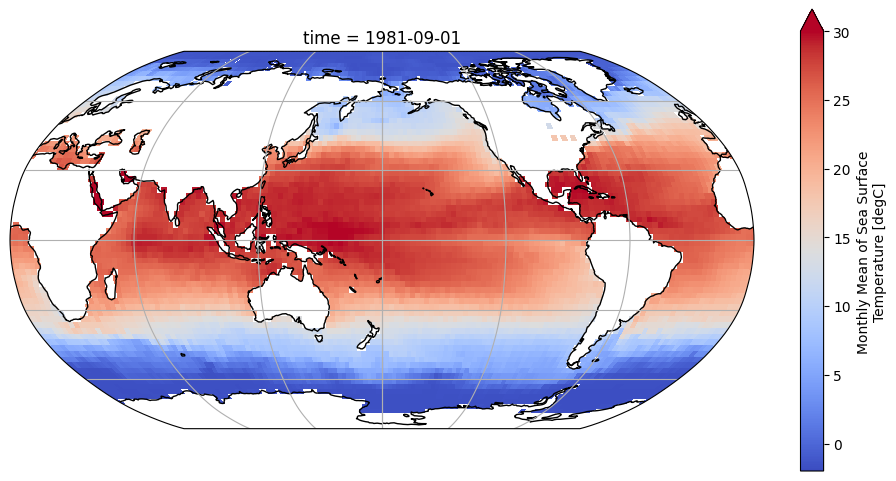

In [12]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()
data.sst.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-2, vmax=30, cmap='coolwarm')

In [13]:
sst_nino34 = data.sel(lat=slice(-5,5), lon=slice(190,240))
sst_nino34

<xarray.Dataset> Size: 173kB
Dimensions:  (time: 504, lon: 21, lat: 4)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2023-08-01
  * lon      (lon) float32 84B 190.0 192.5 195.0 197.5 ... 235.0 237.5 240.0
  * lat      (lat) float32 16B -3.75 -1.25 1.25 3.75
Data variables:
    sst      (time, lat, lon) float32 169kB ...
Attributes:
    CDI:            Climate Data Interface version 1.9.3 (http://mpimet.mpg.d...
    history:        Tue Sep 12 07:33:39 2023: cdo remapbil,r144x72 sst.mon.me...
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    institution:    NOAA/National Centers for Environmental Information
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...
    CDO:            Climate Data Operators version 1.9.3 (http://mpimet.mpg.d...

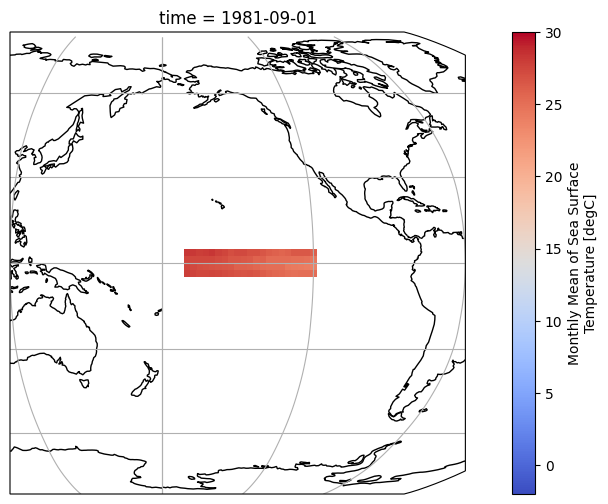

In [14]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()
sst_nino34.sst.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-2, vmax=30, cmap='coolwarm')
ax.set_extent([120,300,10,-10])

In [20]:
gb = sst_nino34.sst.groupby('time.month')
sst_nino34_anom = gb - gb.mean(dim='time')
index_nino34 = sst_nino34_anom.mean(dim=['lat', 'lon'])
print(index_nino34)

<xarray.DataArray 'sst' (time: 504)>
array([-3.19172919e-01, -1.64342746e-01, -5.47262430e-01, -3.09585720e-01,
        1.89207345e-01, -1.36562005e-01, -7.22229332e-02,  1.13533653e-01,
        5.66714585e-01,  7.23883927e-01,  3.27312768e-01,  9.12661254e-01,
        1.31811881e+00,  1.89962804e+00,  1.88368011e+00,  2.36050153e+00,
        2.31075406e+00,  1.95372105e+00,  1.39063811e+00,  8.42881680e-01,
        8.07786822e-01,  5.50078332e-01, -3.20795953e-01, -4.34042037e-01,
       -3.58586729e-01, -9.92037535e-01, -1.23990536e+00, -1.13307941e+00,
       -9.29955423e-01, -1.07970305e-01, -4.86729264e-01, -4.34445649e-01,
       -6.32419586e-01, -1.02405548e+00, -6.66469872e-01, -5.20465851e-01,
       -3.82999420e-01, -7.01901197e-01, -1.24958682e+00, -1.46306205e+00,
       -1.24686980e+00, -8.84642124e-01, -8.41244459e-01, -1.04109442e+00,
       -1.03319824e+00, -1.03781247e+00, -7.77730286e-01, -6.24213815e-01,
       -7.65778244e-01, -6.73053265e-01, -4.53451008e-01, -5.04

Text(0.5, 1.0, 'SST anomaly over the Niño 3.4 region')

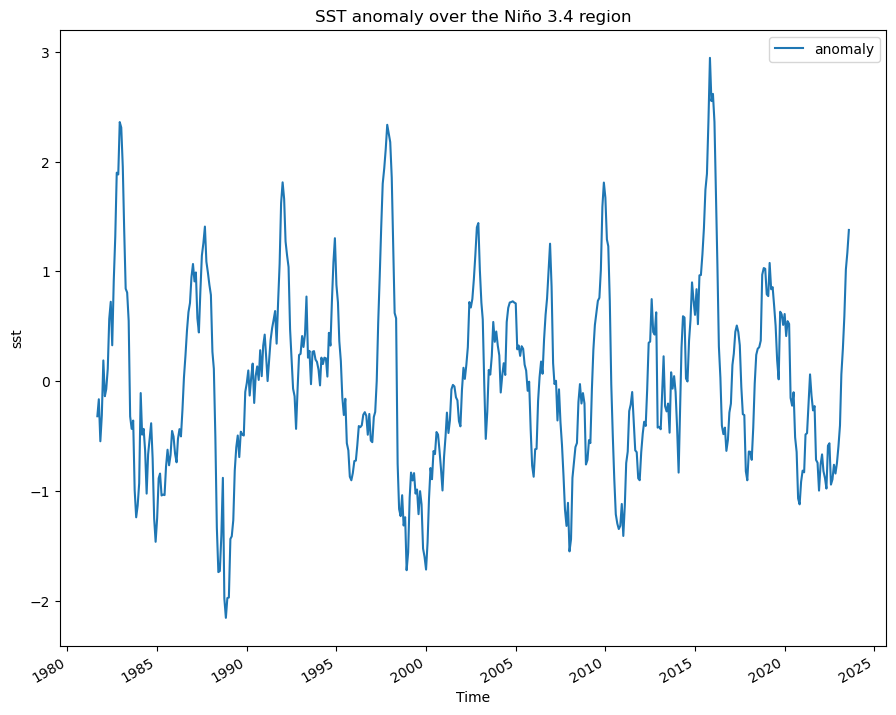

In [21]:
index_nino34_rolling_mean = index_nino34.rolling(time=5, center=True).mean()
index_nino34.plot(size=8)
plt.legend(['anomaly', '5-month running mean anomaly'])
plt.title('SST anomaly over the Niño 3.4 region')

In [22]:
elnino = index_nino34.where(index_nino34 >= 1)
lanina = index_nino34.where(index_nino34 <= -1)
neutral = index_nino34.where((index_nino34 < 1) & (index_nino34 > -1))

In [23]:
print('El Nino:', elnino.count(dim='time').values)
print('La Nina:', lanina.count(dim='time').values)
print('Neutral:', neutral.count(dim='time').values)

counts = [elnino.count(dim='time').values, lanina.count(dim='time').values, neutral.count(dim='time').values]
print(counts)

El Nino: 59
La Nina: 51
Neutral: 394
[array(59), array(51), array(394)]


Text(0.5, 1.0, 'SST anomaly over the Niño 3.4 region')

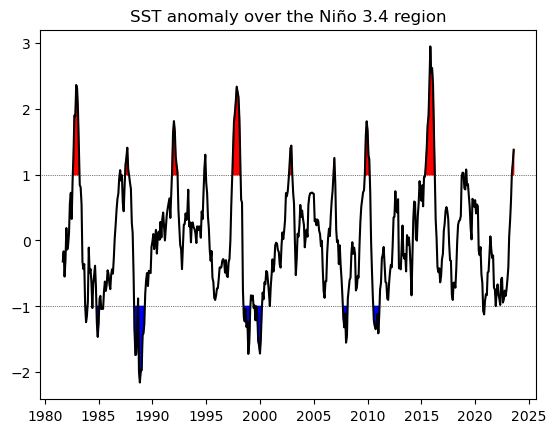

In [24]:
plt.plot(index_nino34['time'], index_nino34, 'k')
plt.fill_between(index_nino34['time'], 1, elnino, color='red')
plt.fill_between(index_nino34['time'], -1, lanina, color='blue')
plt.axhline(1,  color='black', linewidth=0.5, linestyle='dotted')
plt.axhline(-1, color='black', linewidth=0.5, linestyle='dotted')
plt.title('SST anomaly over the Niño 3.4 region')

In [25]:
file = '/home/ubuntu/year3/data_visualisation/precip.mon.mean(1).nc'
ds_precip = xr.open_dataset(file)
ds_precip

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 536, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-08-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2023/07 through latest.

In [26]:
ds_precip = ds_precip.sel(time=slice(index_nino34['time'][0], index_nino34['time'][-1]))
ds_precip

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 504, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-08-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2023/07 through latest.

In [27]:
ds_climo = ds_precip.groupby('time.month').mean()
ds_anoms = ds_precip.groupby('time.month') - ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, time: 504, nv: 2)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time      (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-08-01
    month     (time) int64 9 10 11 12 1 2 3 4 5 6 7 ... 10 11 12 1 2 3 4 5 6 7 8
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (time, lat, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lon_bnds  (time, lon, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    precip    (time, lat, lon) float32 0.07496 0.03842 ... 0.04423 0.03773

In [28]:
elnino_precip = ds_anoms.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
lanina_precip = ds_anoms.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
neutral_precip = ds_anoms.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')
comp_precip = [elnino_precip, lanina_precip, neutral_precip]
print(comp_precip)

[<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon_bnds  (lon, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    precip    (lat, lon) float32 -0.004136 -0.01003 ... 0.02163 0.004282, <xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon_bnds  (lon, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    precip    (lat, lon) float32 0.01642 0.02856 0.01

Text(0.5, 0.98, 'Composite Precipitation Anomalies during ENSO')

/home/ubuntu/anaconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


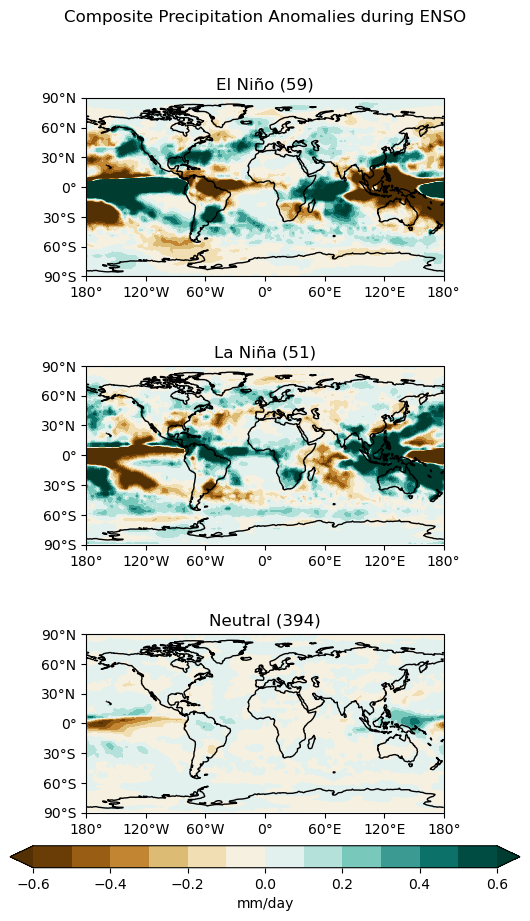

In [29]:
# Precipitation Data
labels = ['El Niño', 'La Niña', 'Neutral']
clevs = np.arange(-0.6, 0.7, 0.1)
fig, axs = plt.subplots(nrows=3, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8.5, 11))
axs = axs.flatten()
for i, enso in enumerate(comp_precip):
    data = comp_precip[i]['precip']
    data, lons = add_cyclic_point(data, coord=comp_precip[i]['lon'])
    cs = axs[i].contourf(lons, comp_precip[i]['lat'], data, clevs, transform = ccrs.PlateCarree(), cmap='BrBG', extend='both')
    axs[i].set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)
    axs[i].set_title(labels[i]+' ('+str(counts[i])+')')
    axs[i].coastlines()

fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.1, hspace=0.5)
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm/day')
plt.suptitle('Composite Precipitation Anomalies during ENSO')

Text(0.5, 0.98, 'Composite Precipitation Anomalies during ENSO')

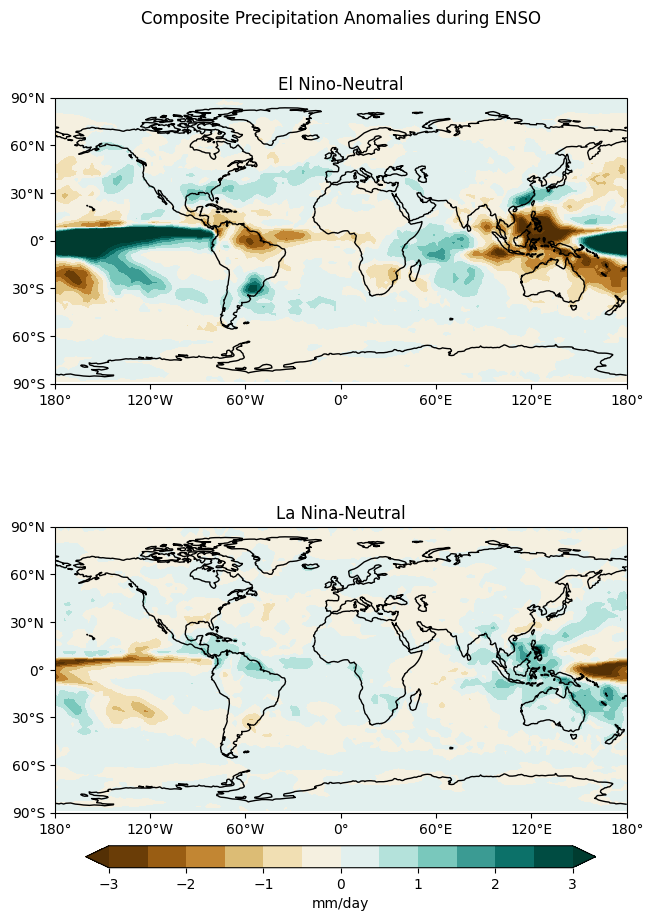

In [34]:
# Then, plot the two maps, showing the difference between the precipitation between the El Nino and La Nina with the Neutral phase.
diff_precip = [elnino_precip - lanina_precip, lanina_precip - neutral_precip]
labels = ['El Nino-Neutral', 'La Nina-Neutral']
clevs = np.arange(-3, 3.5, 0.5)
fig, axs = plt.subplots(nrows=2, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8.5, 11))
axs = axs.flatten()

for i, enso in enumerate(diff_precip):
    data = diff_precip[i]['precip']
    data, lons = add_cyclic_point(data, coord=diff_precip[i]['lon'])
    cs = axs[i].contourf(lons, diff_precip[i]['lat'], data, clevs, transform = ccrs.PlateCarree(), cmap='BrBG', extend='both')

    axs[i].set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    axs[i].set_title(labels[i])
    axs[i].coastlines()

fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.1, hspace=0.5)
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm/day')
plt.suptitle('Composite Precipitation Anomalies during ENSO')  

In [37]:
# Calculate Significance
elnino_precip_vals = ds_anoms.sel(time=elnino.dropna(dim='time')['time'])
lanina_precip_vals = ds_anoms.sel(time=lanina.dropna(dim='time')['time'])
neutral_precip_vals = ds_anoms.sel(time=neutral.dropna(dim='time')['time'])

tstat1, pval1 = ttest_ind(elnino_precip_vals['precip'], neutral_precip_vals['precip'], equal_var =False)
tstat2, pval2 = ttest_ind(lanina_precip_vals['precip'], neutral_precip_vals['precip'], equal_var =False)

In [38]:
p = 0.05
mask_diff1 = diff_precip[0]['precip'].where(pval1 < p)
mask_diff2 = diff_precip[1]['precip'].where(pval2 < p)
mask_diff = [mask_diff1, mask_diff2]
mask_diff

[<xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
 Coordinates:
   * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
   * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8,
 <xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
 Coordinates:
   * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
   * lon      (lon) 

Text(0.5, 0.98, 'Composite Precipitation Differences El Nino - Neutral')

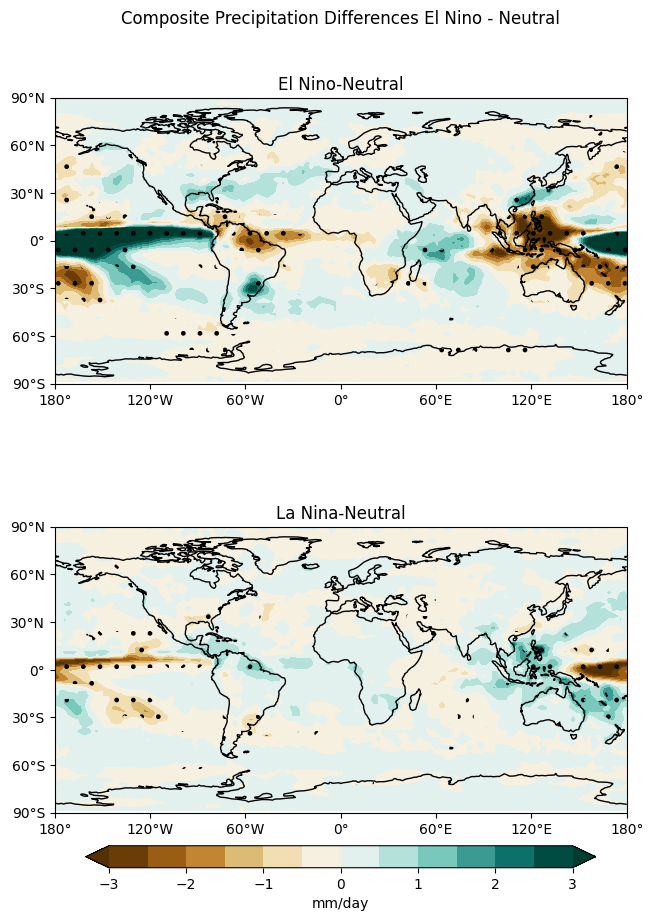

In [40]:
labels = ['El Nino-Neutral', 'La Nina-Neutral']
clevs = np.arange(-3, 3.5, 0.5)
hatch_levs = [0]

fig, axs = plt.subplots(nrows=2, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8.5, 11))

data = diff_precip[0]['precip']
for i, enso in enumerate(diff_precip):
    data = diff_precip[i]['precip']
    data, lons = add_cyclic_point(data, coord=diff_precip[i]['lon'])
    mask_data, lons=add_cyclic_point(mask_diff[i], coord=diff_precip[i]['lon'])

    cs = axs[i].contourf(lons, diff_precip[i]['lat'], data, clevs, transform = ccrs.PlateCarree(), cmap='BrBG', extend='both')
    axs[i].contourf(lons, diff_precip[i]['lat'], mask_data, [0,1], transform =  ccrs.PlateCarree(), colors='None', hatches=['.', ''], extend='both', alpha=0)

    axs[i].set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    axs[i].set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    axs[i].set_title(labels[i])
    axs[i].coastlines()

fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.1, hspace=0.5)
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm/day')
plt.suptitle('Composite Precipitation Differences El Nino - Neutral')  


In [3]:
!pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits
